In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import re
import json

In [3]:
df = pd.read_json('../data/aggregated.json')

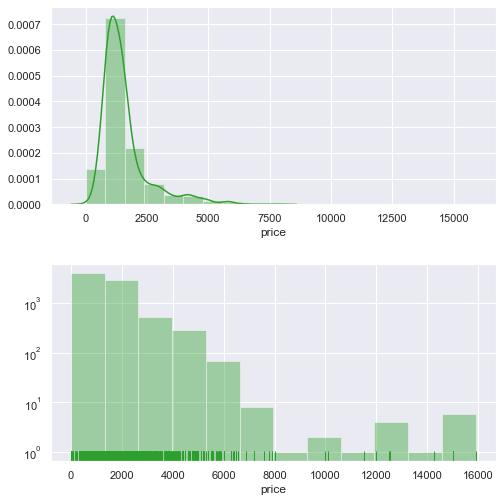

In [11]:
sns.set(style='darkgrid')
plt.subplots(2, 1, figsize=(7,7))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.subplot(2, 1, 1)
ax1 = sns.distplot(df['price'], kde_kws={'bw':200, 'clip':[-1000, 10000]}, bins=20, color='#2ca02c')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2, 1, 2)
ax2 = sns.distplot(df['price'], bins=12, color='#2ca02c', kde=False, rug=True)
ax2.set_yscale('log')
plt.savefig('price-dist.png', dpi=300)

In [12]:
df['price'].describe()

count     7818.000000
mean      1583.984971
std       1095.510351
min          1.000000
25%        989.000000
50%       1299.000000
75%       1725.000000
max      15900.000000
Name: price, dtype: float64

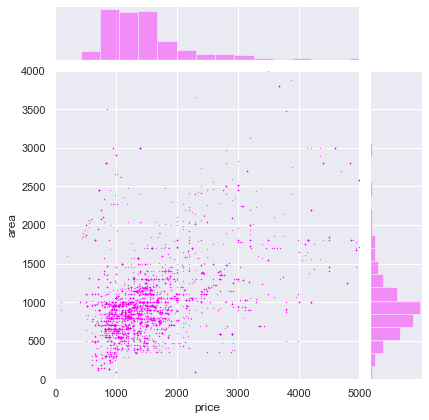

In [21]:
area = df[df['area'].notnull() & df['area'] != 0]['area']
df_plot = df.copy()
df_plot['area'] = area

# ignore outliers! plot does NOT show long tail
sns.set(style='darkgrid')
g = sns.jointplot('price', 'area', df_plot, kind='scatter', alpha=0.8, s=0.1, color='magenta')
g.ax_joint.set_ylim([0, 4000])
g.ax_joint.set_xlim([0, 5000])
plt.savefig('area-vs-price.png', dpi=300)

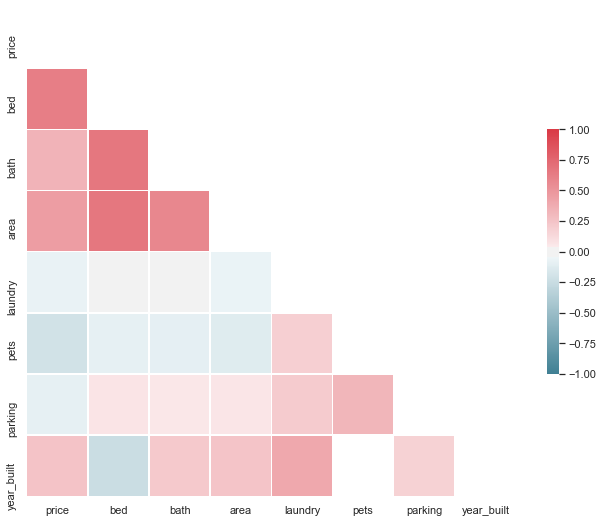

In [14]:
sns.set(style='white')
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('corr-heatmap.png', dpi=300)

Cabrio Properties                       318
Campus Management, Inc.                 206
PMSI                                    177
Oxford Property Management              176
J Keller Properties                     169
The Hayman Company                      138
Oakland Management Corp.                130
Cappo Management & Deinco Properties    123
Issa Properties                         112
Village Green                           102
Name: company, dtype: int64


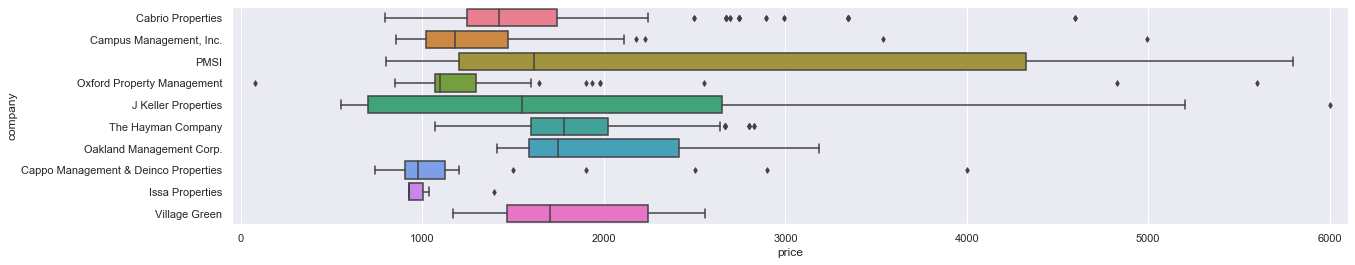

In [116]:
df_plot = df.copy()
companies = df['company'].value_counts().iloc[:10].index.tolist()
print(df['company'].value_counts().iloc[:10])

df_plot = df_plot[df_plot['company'].isin(companies)]
sns.set(style='darkgrid')
plt.subplots(1,1, figsize=(20,4))
sns.boxplot(x='price', y='company', palette="husl", data=df_plot, fliersize=4, order=companies, saturation=0.8)
plt.xlim([-50, 6100])
plt.savefig('boxplot-company.png', dpi=300)